In [1]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

"""
:parameter
--------------------
data: n-array like
[
[1.0 2.3 2.1 0.2]
[0.0 2.4 1.1 0.7]
]
每个元素都是有表示距离的属性的，对于没有距离属性的要抓化成具有距离属性的
"""

from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

dir_name = '/Users/changqingli/data/time_space_cluster/'
feat_file_mini = 'fs_mini'
feat_file_all = 'fs_all'
feat_file_user_shanghai_all = 'fs_user_shanghai_all'


def key_count(cluster_y):
    m = {}
    for i in cluster_y:
        if i not in m:
            m.setdefault(i, 0)
        m[i] += 1
    res = sorted(m.items(), key=lambda x: x[1], reverse=True)
    return res



In [2]:
f_data = []
user_info = []
with open(dir_name + feat_file_user_shanghai_all, 'r') as f:
    for line in f:
        line = line.strip().split("\t")
        line.insert(2, line[1][:4])  # _year
        line.insert(2, line[1][5:7])  # _month
        line.insert(2, line[1][8:10])  # _date
        line.insert(2, line[1][11:13])  # _hour
        f_data.append(line[2:-2])  # [_year,_month,_date,_hour,latitude,longitude]
        user_info.append([line[0], line[-2], line[-1]])



In [3]:
f_data[:2]

[['16', '21', '09', '2019', '31.083843', '121.253874'],
 ['19', '21', '09', '2019', '31.080615', '121.361396']]

In [4]:
user_info[:2]

[['1915658794', 'wtw0z4wk', '外卖事业部'], ['717499794', 'wtw2cdh9', '外卖事业部']]

In [5]:
scale = MinMaxScaler()
scale.fit(f_data)
f_data_transform = scale.transform(f_data)



In [6]:
k_means = KMeans()
k_means.fit(f_data_transform)
cluster_train_counts = key_count(k_means.labels_)
print(cluster_train_counts)



[(1, 28539), (4, 24787), (0, 19928), (6, 19674), (3, 17066), (7, 13462), (5, 9446), (2, 3780)]


In [7]:
test_label = np.reshape(k_means.labels_, [len(k_means.labels_), -1])

print(np.shape(f_data_transform))
print(np.shape(test_label))



(136682, 6)
(136682, 1)


In [8]:
tsne = TSNE()
tsne.fit_transform(test_label)  # 进行数据降维,降成两维


array([[ -8.9105215 ,   5.172948  ],
       [  8.941043  ,  -0.16786742],
       [  1.2221055 ,   1.710037  ],
       ...,
       [  6.6384277 ,  -7.2257633 ],
       [ -2.2188284 , -11.1379795 ],
       [  7.183694  ,  -7.8604083 ]], dtype=float32)

In [9]:
cluster_test = np.concatenate((tsne.embedding_, test_label.reshape([len(test_label), 1])), axis=1)
df=pd.DataFrame(cluster_test, columns=['f_0', 'f_1', 'label']) #转换数据格式



In [10]:
df.head()

,f_0,f_1,label
0,-8.910522,5.172948,0.0
1,8.941043,-0.167867,6.0
2,1.222106,1.710037,1.0
3,4.055113,1.213746,1.0
4,2.230825,10.801237,3.0


label 0 has 19928 sample
label 1 has 28539 sample
label 2 has 3780 sample
label 3 has 17066 sample
label 4 has 24787 sample
label 5 has 9446 sample
label 6 has 19674 sample
label 7 has 13462 sample


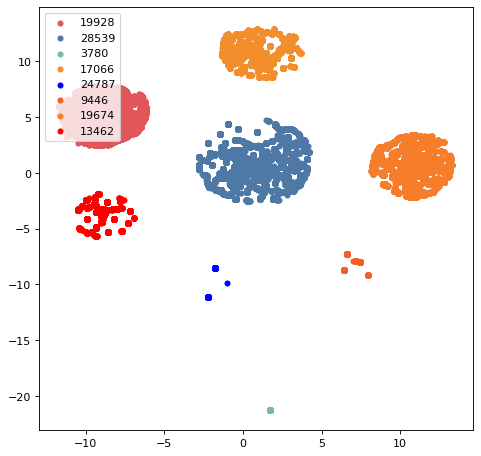

In [11]:
colr = ['#E15759', '#4E79A7', '#76B7B2', '#F28E2B','blue','#F45E2B','#F67E2B', 'r']

plt.figure(figsize=(7, 7), dpi=80)
axes = plt.subplot(111)
types = []
nums = []
for i in range(8):
    d=df[df['label']==i]
    print("label %d has %d sample" % (i, len(d['f_1'].values)))
    type1 = axes.scatter(d['f_0'].values, d['f_1'].values, s=20, c=colr[i])
    types.append(type1)
    nums.append(len(d['f_1'].values))
axes.legend(types, nums, loc=2)

d=df[df['label']==2]

In [12]:
f_data_transform[:20, :]

array([[0.69565217, 0.        , 0.        , 0.        , 0.36157117,
        0.89709561],
       [0.82608696, 0.        , 0.        , 0.        , 0.36137896,
        0.90229122],
       [0.47826087, 0.        , 0.        , 0.        , 0.36137806,
        0.90228769],
       [0.43478261, 0.        , 0.        , 0.        , 0.36137532,
        0.90228054],
       [0.86956522, 0.        , 0.        , 0.        , 0.36137693,
        0.90229069],
       [0.39130435, 0.        , 0.        , 0.        , 0.36310187,
        0.90374066],
       [0.39130435, 0.        , 0.        , 0.        , 0.36310133,
        0.90375463],
       [0.2173913 , 0.        , 0.        , 0.        , 0.36977765,
        0.90486152],
       [0.2173913 , 0.        , 0.        , 0.        , 0.36977765,
        0.90486152],
       [0.86956522, 0.        , 0.        , 0.        , 0.36984119,
        0.90706966],
       [0.86956522, 0.        , 0.        , 0.        , 0.36984119,
        0.90706966],
       [0.86956522, 0